## Sentiment Analysis nel caso della violenza sulle donne
### Progetto per il corso di Reti Geografiche, Strutture analisi e prestazioni

La **Sentiment Analysis** si riferisce all'uso dell'elaborazione del linguaggio naturale, dell'analisi del testo, della linguistica computazionale e della biometria per identificare, estrarre, quantificare e studiare sistematicamente gli stati affettivi e le informazioni soggettive. Viene ampiamente applicata a campi quali recensioni e risposte a sondaggi, media online, social e materiali sanitari per applicazioni che vanno dal marketing al servizio clienti fino alla medicina clinica. ( Fonte: Wikipedia)

L' **hate speech** (o incitamento all'odio) è un evento purtroppo comune su Internet. Spesso i siti di social media come Facebook e Twitter affrontano il problema di identificare e censurare i post problematici mentre soppesano il diritto alla libertà di parola. L'importanza di rilevare e moderare l'incitamento all'odio è evidente dalla forte connessione tra esso e i crimini d'odio effettivi. 

L'identificazione precoce degli utenti che promuovono l'incitamento all'odio potrebbe consentire programmi di sensibilizzazione che tentano di prevenire un'escalation dal discorso all'azione. Siti come Twitter e Facebook hanno cercato di combattere attivamente l'incitamento all'odio. Nonostante queste ragioni, la ricerca della **NLP**(Natural Language Processing) sull'incitamento all'odio è stata molto limitata, principalmente a causa della mancanza di una definizione generale dello stesso o di un'analisi delle sue influenze demografiche o delle sue caratteristiche principali.

### Il Caso Greta Beccaglia

Il progetto si pone l'obiettivo di analizzare attraverso il Machine Learning e la Sentiment Analysis, l'hate speech nei tweet che parlano di argomenti quali sessismo e violenza sulle donne concentrandosi sul caso della giornalista sportiva Greta Beccaglia. 

Il caso viene cosi riassunto: la giornalista stava intervistando i tifosi fuori dallo stadio al termine di una partita di calcio. Un tifoso, le dà una pacca sul sedere, mentre un secondo le urla frasi inopportune, molestie per cui nessuno dei presenti, nè allo stadio nè in studio interviene. Il video dell'accaduto si è diffuso via social, la procura di Firenze ha formalizzato l'accusa di violenza sessuale a carico dei due tifosi già denunciati per le molestie alla giornalista, avvenute mentre era in diretta per una trasmissione sportiva dopo la partita Empoli - Fiorentina del 27 novembre.

Il caso è diventato virale sui social, su Twitter hashtag come **#GretaBeccaglia** e **#violenzasulledonne** raccolgono tutti i pareri sul caso, da entrambe le prospettive. Twitter ci ha permesso quindi di raccogliere informazioni, oltre che sul caso, sulla violenza sulle donne, sulle pene e i provvedimenti attualmente in vigore, su tutto ciò che viene o non viene considerato in casi come questo, se l'interesse mediatico influenza il tipo di pena (se il caso non fosse stato ripreso in diretta TV le conseguenze sarebbero state le medesime o addirittura nulle?).

### Il progetto
Il progetto si divide in 5 fasi:
1. Raccolta dei dati via Twitter tramite hashtag, tra cui #GretaBeccaglia, #violenzasulledonne
2. Costruzione di un dataset di training e uno di test
3. tokenizzazione dei tweet, estrazione dei sostantivi per raggrupparli
4. Topic Modeling tramite `Algo LDA`
5. Analisi dei dati tramite `HateSPeech Detector`

Ci proponiamo di analizzare il sentimento alla base dei tweet forniti dal dataset che andremo a costruire sviluppando una pipeline di apprendimento automatico che coinvolge l'uso di tre classificatori (Logistic Regression, Bernoulli Naive Bayes, e SVM) insieme all'uso di Term Frequency- Inverse Document Frequency (TF-IDF). La performance di questi classificatori viene poi valutata utilizzando l'accuratezza e gli F1 score.

### Project Pipeline
I vari passi coinvoltivsono:

1. Importare le dipendenze necessarie
2. Creazione del dataset
3. Leggere e caricare il dataset
4. Analisi esplorativa dei dati
5. Visualizzazione dei dati delle variabili target
6. Pre-elaborazione dei dati
7. Dividere i nostri dati in sottoinsieme di training e test
8. Trasformazione del dataset usando il TF-IDF Vectorizer
9. Funzione per la valutazione del modello
10. Costruzione del modello
11. Conclusione

### Il Dataset
Il dataset verrà costruito tramite le API di Twitter. Le varie colonne presenti:  
**id**: id univoco del tweet  
**retweet**: numero di condivisione del tweet  
**likes**: numero di mi piace del tweet  
**text**: testo del tweet  
**target**: polarità del tweet(positivo, neutrale o negativo)  
#### 1. Twitter API
Il dataset è stato creato utilizzando le API di Twitter, più nello specifico sono stati raccolti un insieme di tweet in un lasso temporale di una settimana. Sono stati scelti i seguenti hashtag: 
1. #violenzasulledonne
2. #GretaBeccaglia
3. #nontelaprendere
4. #violenzadigenere
5. #molestiesulledonne
6. #violenzamaschile
7. #stopviolenzasulledonne
8. #nonunadimeno 

In [29]:
#consumer key
consumer_key = "SfN46ZhmGV0xRYciUGXMdKfwq"
#consumer key secret
consumer_key_secret = "jSm5a6GWYiikqXZaJbqfDnLtoMTWBv3x7JKiuPr3lxyuQo9RBh"
#access token
access_token = "1225188176580546560-j0Ezuca34PLtZPcpncW3wnjsA3JnjC"
#access token secret
access_token_secret = "CA80WCTRaPMIlVhInYHemSwrfioEVJebKSGbLNpy4fQ9v"
#hashtags
hashtags = ["#violenzasulledonne", "#GretaBeccaglia", "#nontelaprendere", "#violenzadigenere", "#molestiesulledonne",
            "#violenzamaschile", "#stopviolenzasulledonne", "#nonunadimeno", "violenza sulle donne"] 

# uso della libreria tweepy per la raccolta dei tweet con le API di Twitter
import tweepy
import datetime
import sys
import csv

# set dei token e autenticazione
auth = tweepy.AppAuthHandler(consumer_key, consumer_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [30]:
# funzione che prende in input un hashtag e ritorna una lista di tweet correlati
def create_tweets_list(htag):
    #raccolta dei tweet in base all'hashtag
    iterator = tweepy.Cursor(api.search_tweets, q= htag, tweet_mode="extended", lang="it").items(1000)

    lista = list(iterator)
    # seleziona solo i campi che ci interessano
    output = []
    for tweet in lista:
        text = tweet._json["full_text"]
        retweet_count = tweet.retweet_count
        likes = tweet.favorite_count
        line = {'text':text, 'retweet':retweet_count, 'likes': likes}
        output.append(line)  
    return output;    

# Unisce più liste
def Union(lst0, lst1, lst2, lst3, lst4, lst5, lst6, lst7, lst8):
    final_list = lst0 + lst1 + lst2 + lst3 + lst4 + lst5 + lst6 + lst7 + lst8
    return final_list

In [31]:
# Per ogni hashtag crea la relativa lista
# Unisce tutte le liste in un'unica lista comune

list0 = create_tweets_list(hashtags[0])
list1 = create_tweets_list(hashtags[1])
list2 = create_tweets_list(hashtags[2])
list3 = create_tweets_list(hashtags[3])
list4 = create_tweets_list(hashtags[4])
list5 = create_tweets_list(hashtags[5])
list6 = create_tweets_list(hashtags[6])
list7 = create_tweets_list(hashtags[7])
list8 = create_tweets_list(hashtags[8])

final_list = Union(list0, list1, list2, list3, list4, list5, list6, list7, list8)

# creazione dataset .csv
df = pd.DataFrame(final_list)
df.to_csv('tweet_dataset.csv', encoding='utf-8')

# aggiunta colonna per polarità
# 2 per positivo
# 1 per neutrale
# 0 per negativo
df["target"] = 0
df.to_csv("tweet_dataset.csv", index=False)
df.head()

,text,retweet,likes,target
0,** A #Maiori in tanti per dire 'No' alla viole...,0,0,0
1,#14marzo giornata mondiale contro la #violenza...,0,0,0
2,#13marzo giornata mondiale contro la #violenza...,0,0,0
3,RT @ComunediBergamo: #ComunediBergamo | #viole...,3,0,0
4,"""L'urlo delle donne"" è un libro che parla di v...",0,0,0


Dopo aver collezionato i dati, gli stessi vengono convertiti in un `Pandas dataframe` con la funzione `to_csv` per creare la versione del dataset in formato csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import warnings
import re
import tweepy
import datetime
import sys
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

warnings.filterwarnings('ignore')

### Caricamento del dataset

In [3]:
df = pd.read_csv('tweet_dataset.csv')
df.head()

,text,retweet,likes,target
0,** A #Maiori in tanti per dire 'No' alla viole...,0,0,0
1,#14marzo giornata mondiale contro la #violenza...,0,0,0
2,#13marzo giornata mondiale contro la #violenza...,0,0,0
3,RT @ComunediBergamo: #ComunediBergamo | #viole...,3,0,0
4,"""L'urlo delle donne"" è un libro che parla di v...",0,0,0


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1390 non-null   object
 1   retweet  1390 non-null   int64 
 2   likes    1390 non-null   int64 
 3   target   1390 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 43.6+ KB


### Data Preprocessing
Prima di addestrare il modello, abbiamo eseguito vari passaggi di pre-elaborazione sul dataset che si occupano principalmente di rimuovere le stopwords, gli articoli, gli emoji, i link. Il documento di testo è stato poi convertito in minuscolo per una migliore generalizzazione.

Successivamente, le punteggiature sono state pulite e rimosse riducendo così il rumore inutile dal dataset. Dopo di che, abbiamo anche rimosso i caratteri ripetuti dalle parole insieme alla rimozione degli URL in quanto non hanno alcuna importanza significativa.

Infine, abbiamo eseguito lo **Stemming** (riducendo le parole ai loro steli derivati) e la **Lemmatizzazione** (riducendo le parole derivate alla loro forma radice conosciuta come lemma) per ottenere risultati migliori.

In [5]:
# lista delle stopword italiane
stopwordlist = ['il', 'lo', 'la', 'i', 'gli', 'le', 'un', 'uno', 'una', 'di','a', 'da','in','con','su','è','per', 'tra', 'fra','dove','lì','là','sopra','sotto','verso','direzione','destra','sinistra', 'fino', 'interno','esterno', 'davanti','dietro','qui','prima','precedenza','qualche','allora','anticamente','volta','quei', 'proprio','ora','adesso','mentre','frattempo','intanto','questo','questo','quella','quello','momento','alla', 'successivamente','molto','poi', 'seguito','quindi','che','siccome','poiché','perché','ne','quindi','dunque','pertanto','perciò','così', 'invece', 'pure', 'tuttavia','mai','mio','tuo','suo','nostro','vostro','loro','io','tu','egli','lui','lei','noi','voi','loro','essi']
STOPWORDS = set(stopwordlist)

# rimozione degli url
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
#applica sui testi
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))

# rimozione dei nomi degli utenti @nome
def cleaning_Names(data):
    return re.sub('@[\w]*[_-]*[\w]*',' ',data)
#applica sui testi
df['text'] = df['text'].apply(lambda x: cleaning_Names(x))

# rimozione delle cifre numeriche
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))

# pulire i tweet e rimuovere le copie
df['text'] = df['text'].replace('[^ a-zA-Zà-ú'
                            '\😇\😊\❤️\😘\💞\💖\🤗\💕\👏\🎉\👍'
                            '\😂\😡\😠\😭\🤦‍\🤷🏼‍\😞\😱\👎\😓\🔝]', " ",regex=True) 
 # Rimuovo i caratteri in eccesso,
df['text'] = df['text'].replace('\s+', ' ',regex=True)
df['text'] = df['text'].replace('RT ', '',regex=True)
df['text'] = df['text'].replace('^ ', '',regex=True)
df['text'] = df['text'].replace(' $', '',regex=True)
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].replace('^', ' ',regex=True)
df['text'] = df['text'].replace('$', ' ',regex=True)

df.head()

,text,retweet,likes,target
0,a maiori in tanti per dire no alla violenza s...,0,0,0
1,marzo giornata mondiale contro la violenzasul...,0,0,0
2,marzo giornata mondiale contro la violenzasul...,0,0,0
3,comunedibergamo violenzasulledonne una nuova ...,3,0,0
4,l urlo delle donne è un libro che parla di vi...,0,0,0


In [6]:
for word in STOPWORDS:
    df['text'] = df['text'].replace(' ' + word + ' ', ' ',regex=True)
    
df.head()

,text,retweet,likes,target
0,maiori tanti dire no violenza sulle donne s t...,0,0,0
1,marzo giornata mondiale contro violenzasulled...,0,0,0
2,marzo giornata mondiale contro violenzasulled...,0,0,0
3,comunedibergamo violenzasulledonne nuova panc...,3,0,0
4,l urlo delle donne libro parla violenza sulle...,0,0,0


In [7]:
# rimozione spazi finali e iniziali
df['text'] = df['text'].apply(lambda x: x.strip())
df.head()

,text,retweet,likes,target
0,maiori tanti dire no violenza sulle donne s t ...,0,0,0
1,marzo giornata mondiale contro violenzasulledo...,0,0,0
2,marzo giornata mondiale contro violenzasulledo...,0,0,0
3,comunedibergamo violenzasulledonne nuova panch...,3,0,0
4,l urlo delle donne libro parla violenza sulle ...,0,0,0


In [8]:
# tokenizzazione
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'w+')
# df['text'] = df['text'].apply(tokenizer.tokenize)

# df.head()

In [9]:
# stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))

df.head()

,text,retweet,likes,target
0,maiori tanti dire no violenza sulle donne s t ...,0,0,0
1,marzo giornata mondiale contro violenzasulledo...,0,0,0
2,marzo giornata mondiale contro violenzasulledo...,0,0,0
3,comunedibergamo violenzasulledonne nuova panch...,3,0,0
4,l urlo delle donne libro parla violenza sulle ...,0,0,0


In [13]:
#lemmatizzazione
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))

df.head()

,text,retweet,likes,target
0,maiori tanti dire no violenza sulle donne s t ...,0,0,0
1,marzo giornata mondiale contro violenzasulledo...,0,0,0
2,marzo giornata mondiale contro violenzasulledo...,0,0,0
3,comunedibergamo violenzasulledonne nuova panch...,3,0,0
4,l urlo delle donne libro parla violenza sulle ...,0,0,0


## Scelta polarità dei tweet in maniera automatica
Sono state individuate le radici delle parole con accezioni positive o negative.

In [14]:
emoticonsPositive = ('😇','😊','❤️','😘','💞','💖','🤗','💕','👏','🎉','👍','🔝')
emoticonsNegative = ('😂','😡','😠','😭','🤦‍','🤷🏼‍','😞','😱','😓','👎')

radiciPositive = ("ama","amo","affett","allegr","amabil","apprezz","armon","affet",
                  "applaus","abbracc","ador",
                  "bell","ben","beat","brav","buon","benef","brill",
                  "cuor","coeren","celebr",
                  "dolc","divert",
                  "evviva","emoz","elog",
                  "felic","fest","facil",
                  "gentil","god","grazi","generos","gioi", 
                  "innamor", "interes","insieme",
                  "libert",
                  "maestos","miglior",
                  "pace","passion","perfe","piac","pura","purezz","prezios","promuov",
                  "rilass","riabbracc",
                  "solida","spero","speran","success","sì","sacr","stupend","spettacol", 
                  "viv","vin","valor","vale","vera","vittor")
radiciNegative = ("accus","amaro","amarez","arm","ammazz", 
                  "brut","boicott","boh","bho",
                  "condann","cazz","crisi","critic","coglion", 
                  "decent","depress","detest","disgr","delir","damn","drog",
                  "fumo","fuma",
                  "esorcis",
                  "fascis",
                  "guai", 
                  "immat","insult", "inuman","impone",
                  "lent",  
                  "mor","merd","male","maial",
                  "no", "nega","ncazz","negr", 
                  "od","oscur",
                  "perde","preoccup","pusillanim","porc",
                  "rovina",
                  "schif","satan","sprof","soffri","soffer","scandal","scars","sporc", "spar","stalk",
                  "trist","trash","tarocc",
                  "vergogn",
                  "zitt")
radiciDaEscludere = ("now", "nom", "not","noz", "amp", "nor","veramente","imponent")

def define_sentiment(string):
    val = 0
    list_ = string.split()
    for word in list_:

        if word in emoticonsPositive:
            return 2    # Tweet considerato positivo

        elif word in emoticonsNegative:
            return 0    # Tweet considerato negativo

        else:
            if not word.startswith(radiciDaEscludere):

                if (word.startswith(radiciPositive)):
                    val = val + 1

                if (word.startswith(radiciNegative)):
                    if word not in ("non", "nonostante"):
                        val = val - 1

                # Il 'non' cambia dinamicamente la polarita' del tweet
                if word == "non":
                    val = val * -1

                # Tutte le parole prima di 'ma' e 'però' non vengono considerate
                if word in ("ma", "però"):
                    val = 0
    if (val > 0):
        label = 2
    elif(val < 0):
        label = 0
    else:
        label = 1
    return label              

df['target'] = df['text'].apply(lambda tweet: pd.Series(define_sentiment(tweet)))

df.head()
df.to_csv("clean_dataset.csv", index=False)

### Lettura del nuovo dataset pulito + dataset pulito a mano

In [15]:
df = pd.read_csv('hand_clean_dataset.csv')
df.head()

,text,retweet,likes,target
0,ancora caso maltrattamenti uomo chiaromonte pz...,1,0,1
1,false denunce non esistono donna denuncia va s...,8,0,2
2,senso responsabilità e sua visione possano ess...,13,0,2
3,quando legge non funziona violenzasulledonne c...,0,0,1
4,diavolo ha fatto rimanere sul posto lavoro pre...,0,1,0


### Data Visualization

<AxesSubplot:title={'center':'Distribuzione dei dati'}, xlabel='target', ylabel='count'>

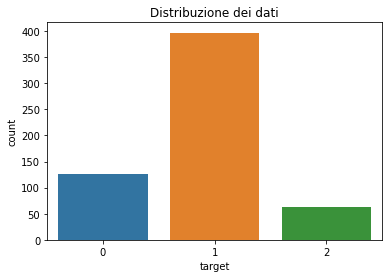

In [16]:
# distribuzione del dataset
ax = df.groupby('target').count().plot(kind='bar', title='Distribuzione dei dati',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# conserva i dati in liste.
text, sentiment = list(df['text']), list(df['target'])

sns.countplot(x='target', data=df)

### Cloud of Word

In [20]:
# seleziona testo e polarità
data = df[['text', 'target']]
# separa tweet negativi e positivi
data_pos = data[data['target'] == 2]
data_neu = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
# combina i tweet
dataset = pd.concat([data_pos, data_neu, data_neg])
# separazione di testo e target
X = data.text
y = data.target

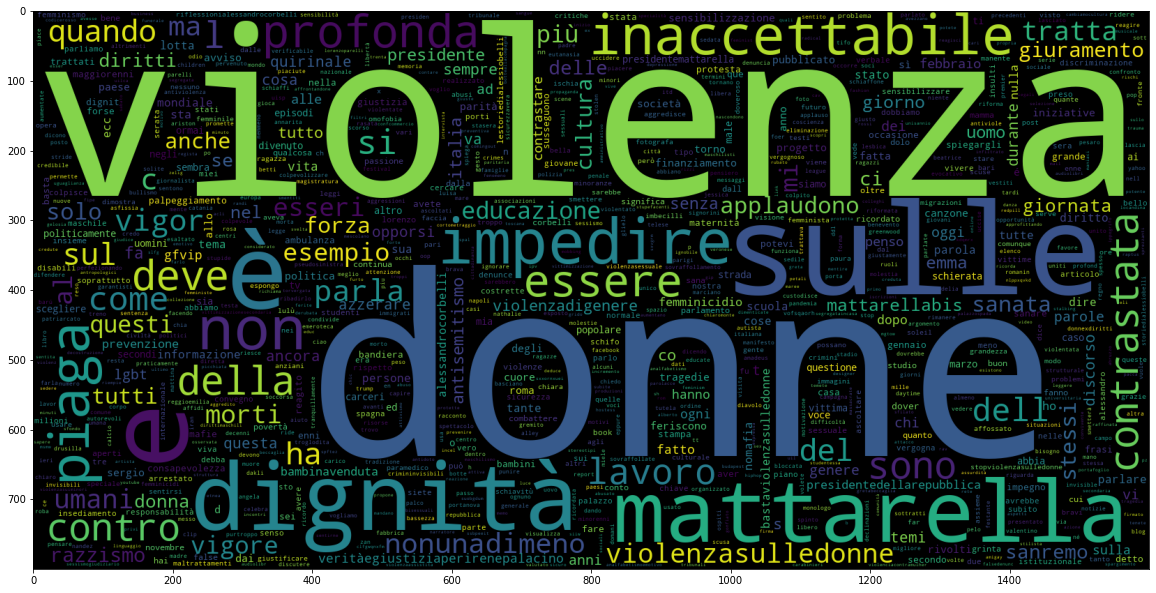

In [21]:
# plot per i tweet negativi
data_neg = data['text'][:500]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

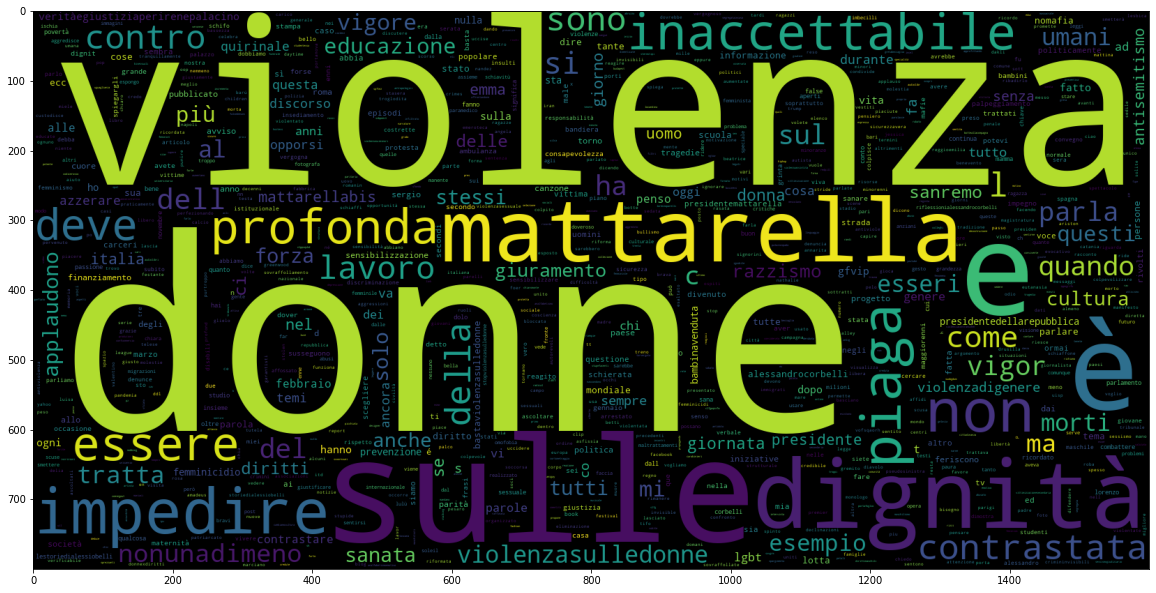

In [22]:
# plot per i tweet neutrali
data_neu = data['text'][:500]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

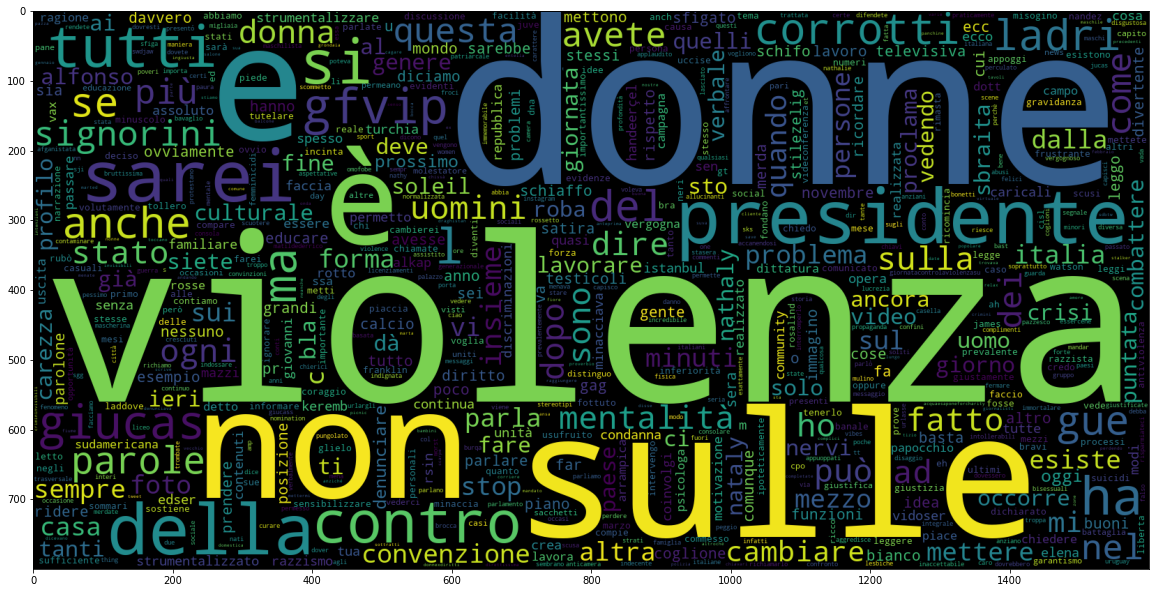

In [23]:
#plot per i tweet positivi
data_pos = data['text'][500:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Conclusioni



